In [34]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

#import json file to data frame, converting to datetime dtype
df = pd.read_json('logins.json', convert_dates='login_time')

#Set datetime as index
df = df.set_index(['login_time'])

#new column used to aggregate counts
df['ones'] = 1

df.head()

,ones
login_time,
1970-01-01 20:13:18,1
1970-01-01 20:16:10,1
1970-01-01 20:16:37,1
1970-01-01 20:16:36,1
1970-01-01 20:26:21,1


In [73]:
#creates counts of login withing 15 minutes interval
df_counts_15inv = df.resample('15T').sum()

#extract classifying data from datetime
df_counts_15inv['year'] = df_counts_15inv.index.year
df_counts_15inv['month'] = df_counts_15inv.index.month
df_counts_15inv['day'] = df_counts_15inv.index.day
df_counts_15inv['hour'] = df_counts_15inv.index.hour
df_counts_15inv['minute'] = df_counts_15inv.index.minute
df_counts_15inv['weekday'] = df_counts_15inv.index.weekday
df_counts_15inv['time'] = df_counts_15inv.index.time

<BarContainer object of 7 artists>

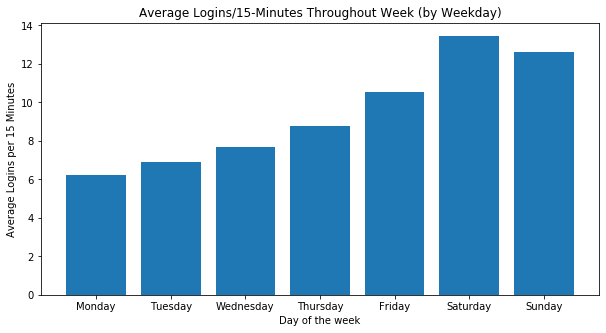

In [100]:
#Create Aggregate As Described by Graph Printed
x = df_counts_15inv.groupby('weekday').ones.mean().index
y = df_counts_15inv.groupby('weekday').ones.mean().values

#Choose Size
plt.figure(figsize=(10,5))
plt.title('Average Logins/15-Minutes Throughout Week (by Weekday)')
plt.ylabel('Average Logins per 15 Minutes')
plt.xlabel('Day of the week')
#add weekday labels to x axis
plt.xticks(x,labels=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.bar(x, y)

## Weekly Averages

From the aggregation displayed on the plot above, there a patter that Ultimate's transportation services are used more on the weekends than the weekdays, where there is a steady increase of use from Monday to Saturday, and small drop on Sunday, and a significant drop on Monday.

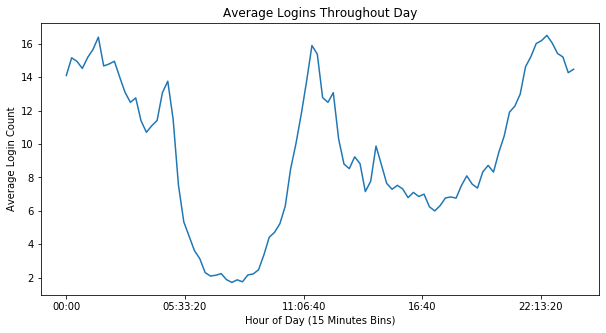

In [83]:
x = df_counts_15inv.groupby('time').ones.mean().index
y = df_counts_15inv.groupby('time').ones.mean().values

plt.figure(figsize=(10,5))
plt.title('Average Logins Throughout Day')
plt.ylabel('Average Login Count')
plt.xlabel('Hour of Day (15 Minutes Bins)')
plt.plot(x, y)

## Daily Trend

The average daily trend is a high amough of use from the early morning until about 5:00, then a drop of a activity with a second peak centered around 11:00. After the peak, there's a quick drop again, not a low, followed by another end of the day peak. I should be suspected that transportation use differs depending on the day of the week, and by extension, the login rate.

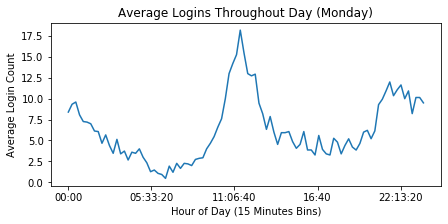

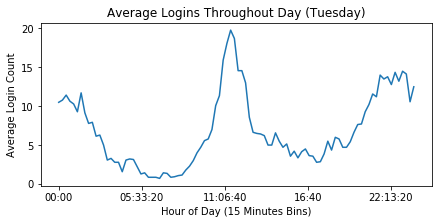

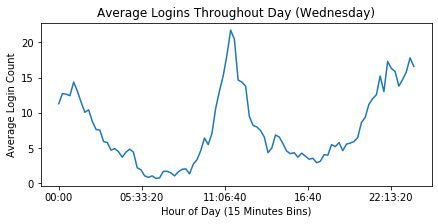

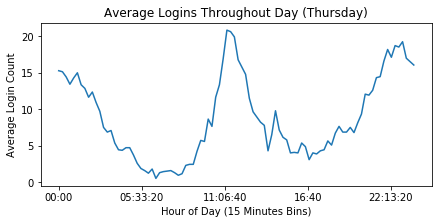

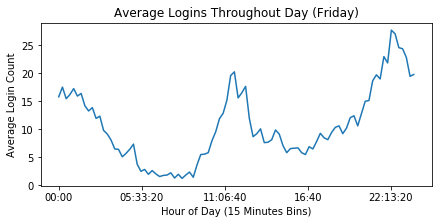

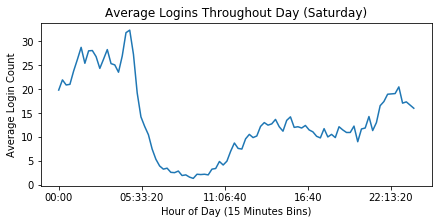

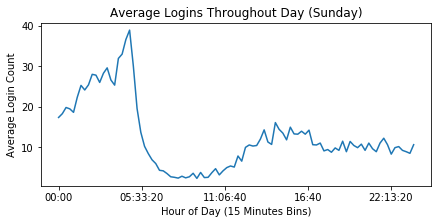

In [82]:
import matplotlib.pyplot as plt

for ind, day in enumerate(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']):

    x = df_counts_15inv[df_counts_15inv['weekday'] == ind].groupby('time').ones.mean().index
    y = df_counts_15inv[df_counts_15inv['weekday'] == ind].groupby('time').ones.mean().values

    plt.figure(figsize=(7,3))
    title = 'Average Logins Throughout Day ('+ day+')'
    plt.title(title)
    plt.ylabel('Average Login Count')
    plt.xlabel('Hour of Day (15 Minutes Bins)')
    plt.plot(x, y)

## Weekday vs Weekend Trends

There is a significantly different trend between the weekends and the weekdays. 

On weekdays, there is decent use from the 12:00 which steadily decreases until hitting a low at about 6:00. From there, the login rate dramatically increases until a little pass 11:00, perhaps this is caused by people who are working going to lunch. After this peak, the rate slows down, but not as slow as the morning's lowpoint. Then at the end of the day, around 22:00, a final peak of logins come through.

<BarContainer object of 4 artists>

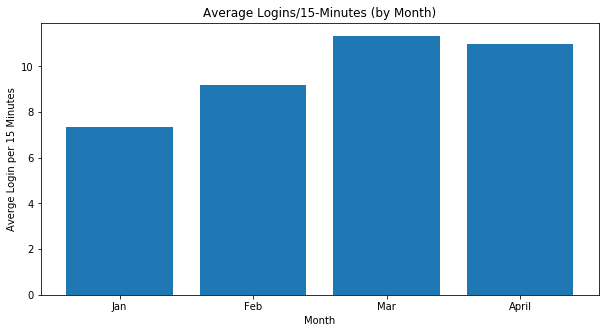

In [99]:
x = df_counts_15inv.groupby('month').ones.mean().index
y = df_counts_15inv.groupby('month').ones.mean().values

plt.figure(figsize=(10,5))
plt.title('Average Logins/15-Minutes (by Month)')
plt.ylabel('Averge Login per 15 Minutes')
plt.xlabel('Month')
plt.xticks(x,labels=['Jan','Feb','Mar','April'])
plt.bar(x, y)

## Monthly Trends

From the basic bar graph, it is apparent that there was an increase of traffic between January and March, and then a small decrease from March to April

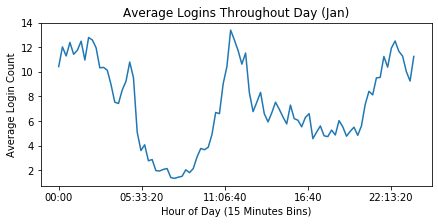

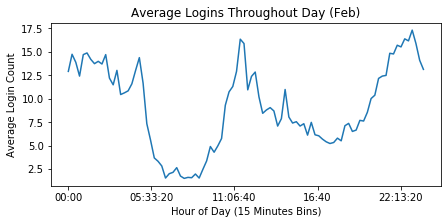

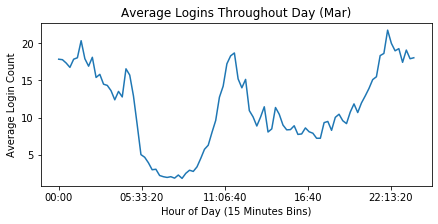

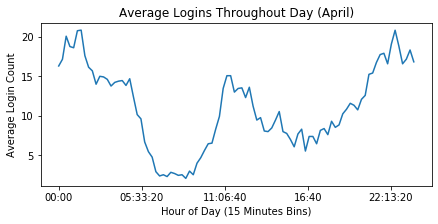

In [92]:
import matplotlib.pyplot as plt

for ind, month in enumerate(['Jan','Feb','Mar','April']):

    x = df_counts_15inv[df_counts_15inv['month'] == ind + 1].groupby('time').ones.mean().index
    y = df_counts_15inv[df_counts_15inv['month'] == ind + 1].groupby('time').ones.mean().values

    plt.figure(figsize=(7,3))
    title = 'Average Logins Throughout Day ('+ month+')'
    plt.title(title)
    plt.ylabel('Average Login Count')
    plt.xlabel('Hour of Day (15 Minutes Bins)')
    plt.plot(x, y)

## Daily Traffic Depending on Month
Making a similar analysis before, the plots above show the average daily highs and lows depending on month. There does not seem to be significant differences between months